# **Nama: Marcel Kurniawan**

# **Instalation and Library**

In [1]:
!pip install nlp-id

In [2]:
!pip install newspaper3k

In [3]:
import re
import nltk
import warnings
import pandas as pd
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
warnings.filterwarnings("ignore")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from urllib.parse import urlparse

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Data Collection**

Dalam proses data collection, saya telah menerapkan teknik ***web scraping*** dengan menggunakan library newspaper3k. Teknik ini digunakan untuk mengekstrak informasi dari 42 artikel berita yang mencakup tiga kategori utama: `politik`, `olahraga`, dan `hiburan`. Sumber berita yang saya ambil berasal dari sembilan media digital yang beragam. Alasan saya memilih pendekatan ini adalah karena beberapa keunggulannya, seperti:


*   **Efisiensi dan efektivitas** -> *Web scraping* dapat dilakukan secara otomatis dan berulang, sehingga dapat menghemat waktu dan tenaga.
*   **Keakuratan** -> Dengan *Web scraping* dapat dipastikan bahwa informasi yang diambil adalah akurat dan sesuai.
*   **Komprehensif** -> *Web scraping* dapat digunakan untuk mengambil informasi dari berbagai sumber berita, sehingga dapat menghasilkan data yang lebih komprehensif.

Berikut adalah beberapa langkah yang saya lakukan untuk melakukan web scraping untuk pengambilan informasi dari berita:



1.   Membuat daftar URL berita yang disimpan didalam array dari berita yang akan diambil informasinya.
2.   Membuat code untuk dapat mengakses URL berita dan mengambil informasi yang dibutuhkan dengan mengunakan beberapa library.
3.   Data yang didapat disimpan kedalam sebuah array yang kemudian berikutnya akan dimasukan kedalam dataframe.

Untuk melakukan webscraping, disini saya menggunakan beberapa library untuk mempermudah tugas.

List library:
*   **newspaper3k** -> Mengambil informasi/isi teks yang ada didalam berita
*   **urllib.parse** -> Secara otomatis mengambil nama media dari nama domain yang tertera pada url, dengan menggunakan libarary ini secara otomatis tidak perlu lagi melabelkan nama media secara manual. Namun tentunya dengan berbagai penyesuaian yang dilakukan dalam kode agar benar-benar hanya nama media saja yang diambil.





In [ ]:
from newspaper import Article
from urllib.parse import urlparse

In [ ]:
article_url = ["https://sports.sindonews.com/read/1242145/11/dirumorkan-gantikan-erik-ten-hag-ruben-amorim-saya-belum-dihubungi-mu-1698981115",
               "https://www.kompas.id/baca/polhuk/2023/11/02/putusan-mk-soal-usia-capres-cawapres-bisa-dibatalkan",
               "https://www.cnbcindonesia.com/news/20231102231013-4-486000/hasil-survei-terbaru-capres-2024-anies-vs-ganjar-vs-prabowo",
               "https://www.cnnindonesia.com/hiburan/20231104155459-220-1019994/studio-beri-tawaran-baru-ke-serikat-aktor-berharap-akhiri-mogok",
               "https://www.kompas.id/baca/bebas-akses/2023/10/31/konser-kla-project-harmoni-cahaya-jadi-ungkapan-syukur",
               "https://www.cnnindonesia.com/olahraga/20231103221814-142-1019873/justin-hubner-bek-wolves-yang-segera-jadi-warga-indonesia",
               "https://www.cnnindonesia.com/nasional/20231102161226-617-1019235/pdip-megawati-jokowi-sepakat-usung-ganjar-capres-pada-maret-2023",
               "https://www.bbc.com/indonesia/articles/cz9rx70lyq9o",
               "https://www.bbc.com/indonesia/articles/cjk855v62gyo",
               "https://sports.sindonews.com/read/1242491/51/bagasfikri-petik-pelajaran-berharga-dari-2-laga-final-beruntun-di-eropa-1698999119",
               "https://www.kompas.id/baca/bebas-akses/2023/10/30/kla-project-yang-menikmati-perjalanan",
               "https://www.cnbcindonesia.com/news/20231103135005-4-486172/media-asing-soroti-politik-dinasti-di-asean-sebut-pemilu-ri",
               "https://www.cnnindonesia.com/hiburan/20231103141219-227-1019628/konser-baru-pekan-depan-fan-taylor-swift-gelar-kamping-sejak-juni",
               "https://bola.kompas.com/read/2023/10/30/09000008/500-peserta-ramaikan-kegiatan-lari-dan-jalan-santai-di-danau-singkarak",
               "https://www.cnnindonesia.com/hiburan/20231103142442-227-1019636/5-rekomendasi-konser-dan-gig-akhir-pekan-disney-princess-the-concert",
               "https://www.cnnindonesia.com/nasional/20231028122432-617-1017035/sebaran-elektabilitas-capres-di-pulau-jawa-hasil-berbagai-survei",
               "https://www.bbc.com/indonesia/majalah-67270442",
               "https://kabar24.bisnis.com/read/20231103/15/1710762/survei-capres-ganjar-dominasi-jateng-jatim-prabowo-kuasai-jabar-anies-jakarta",
               "https://www.liputan6.com/bola/read/5444296/sir-jim-ratcliffe-akan-pecat-erik-ten-hag-tunjuk-roberto-de-zerbi-sebagai-manajer-manchester-united?page=4",
               "https://nasional.kompas.com/read/2023/11/03/13543011/nasdem-pastikan-anies-muhaimin-bakal-ikut-uji-publik-yang-digelar-pp",
               "https://www.cnnindonesia.com/olahraga/20231103144645-142-1019645/inggris-u-17-bawa-2-pemain-yang-sudah-merumput-di-premier-league",
               "https://www.liputan6.com/news/read/5443609/headline-menanti-pengumuman-timses-capres-cawapres-pilpres-2024-berebut-tokoh-populer?page=4",
               "https://bola.kompas.com/read/2023/11/03/09300078/saran-agar-mbappe-menang-ballon-d-or-bawa-psg-dan-perancis-berjaya?page=all#page2",
               "https://news.detik.com/pemilu/d-7020701/janji-janji-bakal-cawapres-cak-imin-jika-menang-pilpres?single=1",
               "https://hot.detik.com/berita-kpop/d-7017813/mantan-idola-k-pop-umumkan-perceraian-eks-suami-diduga-kdrt",
               "https://www.liputan6.com/pemilu/read/5444235/ganjar-janjikan-haki-bisa-jadi-akses-modal-pada-pelaku-industri-kreatif?page=3",
               "https://www.liputan6.com/bola/read/5444196/ditendang-manchester-united-jadon-sancho-bisa-gabung-ke-tottenham-hotspur?page=4",
               "https://news.detik.com/pemilu/d-6974647/survei-capres-poltracking-di-jabar-prabowo-44-2-anies-25-ganjar-21-8",
               "https://www.cnnindonesia.com/hiburan/20231102130926-220-1019087/nicolas-cage-akui-proses-syuting-superman-dan-hasil-di-the-flash-beda",
               "https://www.cnnindonesia.com/nasional/20231103172502-617-1019765/cak-imin-ungkap-survei-terbaru-klaim-ada-peluang-menang-1-putaran",
               "https://www.beritasatu.com/sport/1075480/prediksi-sociedad-vs-barcelona-mampukah-barca-bangkit",
               "https://www.cnnindonesia.com/hiburan/20231103141007-220-1019625/sinopsis-bastille-day-the-take-bioskop-trans-tv-3-november-2023",
               "https://www.liputan6.com/news/read/5431028/infografis-prabowo-usung-gibran-jadi-cawapres-di-pilpres-2024?page=3",
               "https://www.beritasatu.com/sport/1075427/tumbang-atletico-gagal-puncaki-klasemen-liga-spanyol",
               "https://www.bbc.com/indonesia/majalah-66394554",
               "https://www.bbc.com/indonesia/articles/cpvl6n9v0epo",
               "https://sport.detik.com/sepakbola/liga-inggris/d-7018772/prediksi-man-city-vs-bournemouth-the-citizens-dijagokan-menang-3-0",
               "https://lifestyle.bisnis.com/read/20231104/254/1711110/sinopsis-film-budi-pekerti-tayang-di-bioskop-ini-tanggapan-para-artis",
               "https://www.liputan6.com/bola/read/5438937/kepincut-performa-kepa-arrizabalaga-real-madrid-berencana-tawarkan-kontrak-permanen?page=4",
               "https://lifestyle.bisnis.com/read/20231103/254/1710807/19-rekomendasi-film-psikopat-korea-alur-cerita-sadis-terbaik",
               "https://bola.kompas.com/read/2023/11/03/21034978/hasil-psm-vs-persija-2-3-banjir-gol-macan-kemayoran-putus-tren-negatif?page=all#page2",
               "https://lifestyle.sindonews.com/read/1015737/157/agnez-mo-yakin-hiburan-tanah-air-bisa-jadi-kiblat-internasional-karena-talenta-kita-luar-biasa-1675677730?showpage=all"]

In [ ]:
label = ["Olahraga",
         "Politik",
         "Politik",
         "Hiburan",
         "Hiburan",
         "Olahraga",
         "Politik",
         "Hiburan",
         "Hiburan",
         "Olahraga",
         "Hiburan",
         "Politik",
         "Hiburan",
         "Olahraga",
         "Hiburan",
         "Politik",
         "Olahraga",
         "Politik",
         "Olahraga",
         "Politik",
         "Olahraga",
         "Politik",
         "Olahraga",
         "Politik",
         "Hiburan",
         "Politik",
         "Olahraga",
         "Politik",
         "Hiburan",
         "Politik",
         "Olahraga",
         "Hiburan",
         "Politik",
         "Olahraga",
         "Hiburan",
         "Politik",
         "Olahraga",
         "Hiburan",
         "Olahraga",
         "Hiburan",
         "Olahraga",
         "Hiburan"]

In [ ]:
total = len(article_url)
data = []
domains = []

for i in range (0,total):
  print(article_url[i])
  article = Article(article_url[i], 'id')
  article.download()
  article.parse()
  data.append(article.text)
  domain = urlparse(article_url[i]).hostname.split('.')[1]
  domains.append(domain)

https://sports.sindonews.com/read/1242145/11/dirumorkan-gantikan-erik-ten-hag-ruben-amorim-saya-belum-dihubungi-mu-1698981115
https://www.kompas.id/baca/polhuk/2023/11/02/putusan-mk-soal-usia-capres-cawapres-bisa-dibatalkan
https://www.cnbcindonesia.com/news/20231102231013-4-486000/hasil-survei-terbaru-capres-2024-anies-vs-ganjar-vs-prabowo
https://www.cnnindonesia.com/hiburan/20231104155459-220-1019994/studio-beri-tawaran-baru-ke-serikat-aktor-berharap-akhiri-mogok
https://www.kompas.id/baca/bebas-akses/2023/10/31/konser-kla-project-harmoni-cahaya-jadi-ungkapan-syukur
https://www.cnnindonesia.com/olahraga/20231103221814-142-1019873/justin-hubner-bek-wolves-yang-segera-jadi-warga-indonesia
https://www.cnnindonesia.com/nasional/20231102161226-617-1019235/pdip-megawati-jokowi-sepakat-usung-ganjar-capres-pada-maret-2023
https://www.bbc.com/indonesia/articles/cz9rx70lyq9o
https://www.bbc.com/indonesia/articles/cjk855v62gyo
https://sports.sindonews.com/read/1242491/51/bagasfikri-petik-pelaj

In [ ]:
dataframes = {'Teks': data, 'Media': domains, 'Label': label}
df = pd.DataFrame(dataframes)

In [ ]:
df.head(42)

,Teks,Media,Label
0,"Dirumorkan Gantikan Erik ten Hag, Ruben Amorim...",sindonews,Olahraga
1,Mahkamah Konstitusi akan kembali menguji atura...,kompas,Politik
2,"Surabaya, CNBC Indonesia - Accurate Research a...",cnbcindonesia,Politik
3,"--\n\nPihak studio melalui asosiasinya, AMPTP,...",cnnindonesia,Hiburan
4,Adi Adrian mengaku tak benar-benar memikirkan ...,kompas,Hiburan
5,--\n\nKetua Umum PSSI Erick Thohir memastikan ...,cnnindonesia,Olahraga
6,--\n\nSekretaris Jenderal (Sekjen) PDIP Hasto ...,cnnindonesia,Politik
7,The Beatles rilis 'lagu terakhir' yang tertund...,bbc,Hiburan
8,Daftar 100 buku anak-anak terbaik sepanjang ma...,bbc,Hiburan
9,Bagas/Fikri Petik Pelajaran Berharga dari 2 La...,sindonews,Olahraga


In [ ]:
df.to_csv('dataset.csv', index=False)

Setelah data dari berbagai website berita didapat, kemudian berikutnya akan disimpan kedalam dataframe serta di export menjadi .csv, hal ini dilakukan agar tidak melakukan web scraping berulang-ulang yang memakan banyak waktu mengingat website yang di-scrape cukup banyak.

# **Data Understanding**

Karena sebelumnya dataset dari berita sudah di export menjadi .csv, maka untuk efisiensi waktu saya dapat langsung meggunakan dataset yang telah di export, sehingga saya tidak perlu mengulangi proses data collection yang cukup memakan waktu mengingat jumlah berita yang di scrape lumayan banyak yaitu sekitar 42 url.

In [4]:
path = '/content/dataset.csv'

In [5]:
df=pd.read_csv(path)

In [6]:
df['Label'].value_counts()

Olahraga    14
Politik     14
Hiburan     14
Name: Label, dtype: int64

Pada data collection ini saya sengaja untuk mengambil jumlah sample yang sama untuk setiap kelas agar tidak terjadi unbalanced data yang tentunya dapat mempengaruhi performa model.

In [7]:
df['Media'].value_counts()

cnnindonesia     10
kompas            7
liputan6          6
bbc               5
detik             4
sindonews         3
bisnis            3
cnbcindonesia     2
beritasatu        2
Name: Media, dtype: int64

Berikut adalah nama dan jumlah dari setiap media digital yang digunakan beserta jumlah data setiap kategori.

In [8]:
df.head(5)

,Teks,Media,Label
0,"Dirumorkan Gantikan Erik ten Hag, Ruben Amorim...",sindonews,Olahraga
1,Mahkamah Konstitusi akan kembali menguji atura...,kompas,Politik
2,"Surabaya, CNBC Indonesia - Accurate Research a...",cnbcindonesia,Politik
3,"--\n\nPihak studio melalui asosiasinya, AMPTP,...",cnnindonesia,Hiburan
4,Adi Adrian mengaku tak benar-benar memikirkan ...,kompas,Hiburan


In [9]:
df['Teks'].iloc[2]

'Surabaya, CNBC Indonesia - Accurate Research and Consulting Indonesia (ARCI) merilis hasil survei terbaru di Jatim terkait elektabilitas bacapres-bacawapres yang sudah mendaftar di KPU. Hasilnya Prabowo-Subianto-Gibran Rakabuming Raka berada di posisi teratas.\n\n\n\nMenurut survei ARCI, ektabilitas Prabowo-Gibran di angka 40,1%. Kemudian disusul Ganjar Pranowo-Mahfud MD 35,9%. Dan pasangan Anies Baswedan-Muhaimin Iskandar di angka 22,2%.\n\n\n\nDirektur ARCI Baihaki Sirajt membeberkan faktor Prabowo-Gibran unggul di Jatim. Salah satunya migrasi pendukung PDIP yang awalnya memilih Ganjar Pranowo, kini beralih ke Prabowo.\n\n\n\n"Pemilih PDIP, terutama di basis Mataraman yang awalnya memilih capresnya Ganjar, kini beralih ke Prabowo karena faktor Gibran," kata Baihaki saat paparan di Surabaya, Rabu (1/11/2023).\n\n\n\nBaihaki menyebut sebanyak 33,7% pemilih PDIP memilih Prabowo-Gibran. Sementara 66,3% memilih Ganjar-Mahfud. Tidak ada pemilih PDIP yang ke Anies Baswedan-Muhaimin Iskanda

#### **Check the Data**
*   Disini bisa kita lihat bahwa terdapat iklan dengan kalimat sebagai berikut yang harus diclean "ADVERTISEMENT SCROLL TO CONTINUE WITH CONTENT"
*   Terdapat nama media_digital dari teks, karena dengan adanya nama suatu media digital seperti cnnindonesia pada sebuah teks akan dapat mempengaruhi performa dari model.
*   Terdapat nama kota pada opening berita sebagai contoh: Surabaya, CNBC Indonesia, pada contoh ini maka kata Surabaya akan dihapus.
*   Terdapat angka dari teks seperti tahun, waktu, nilai dan sebagainya yang tidak memiliki konteks.
*   Sisanya untuk lebih lengkap akan dijelaskan dan dihandling di bagian text preprocessing.

# **Text Prepocessing**

#### **Data Cleansing**

Pada tahap text preprocessing, saya melakukan beberapa proses cleaning terhadap data ini, berikut adalah cleaning yang saya lakukan:

1. Mengubah semua teks dalam DataFrame menjadi huruf kecil. Hal ini dilakukan karena data teks peka terhadap huruf besar-kecil dan mengubah semuanya menjadi huruf kecil memastikan keseragaman.

2. Menghapus nama kota pada opening berita sebagai contoh: `Surabaya, CNBC Indonesia`, pada contoh ini maka kata `Surabaya` akan dihapus.

3. Menghapus semua URL dari teks `Liputan6.com, KOMPAS.com` dan sebagainya.

4. Menghapus domain `.com` dari teks apabila ada yang terlewat dari proses sebelumnya

5. Menghapus semua angka dari teks seperti tahun, waktu, nilai dan sebagainya yang tidak memiliki konteks.

6. Menghapus semua karakter non-kata dari teks seperti simbol dan karakter unik.

7. Mengganti spasi berlebih dengan spasi tunggal.

8. Menghapus semua tagar dari teks seperti `#MachesterUnited`.

9. Menghapus semua stop words dari teks karena stopwords adalah kata-kata yang sering muncul dalam teks tetapi tidak memberikan banyak informasi tentang konten teks tersebut. Dalam bahasa Indonesia, contoh stopwords adalah `yang`, `dan`, `di`, dll.
Dalam klasifikasi berita, tujuannya adalah untuk memahami topik atau subjek dari berita tersebut. Kata-kata yang paling informatif biasanya adalah kata-kata yang lebih jarang muncul, seperti nama, tempat, atau kata-kata khusus yang berkaitan dengan topik berita.

10. Menghapus nama `media_digital` dari teks, karena dengan adanya nama suatu media digital seperti `cnnindonesia` pada sebuah teks akan dapat mempengaruhi performa dari model. Sebagai contoh sebagian besar media `cnnindonesia` berlabel `olahraga`, dengan begitu apabila kata terdapat kata `cnnindonesia` pada suatu teks, maka kemungkinan besar model cenderung akan memprediksi bahwa suatu teks yang memiliki kata `cnnindonesia` merupakan berita dengan kategori `olahraga`. Namun untuk beberapa media digital dengan nama yang umum seperti detik dan bisnis tidak akan dihapus, karena nama-nama ini umum digunakan dalam beberapa kategori berita.

11. Menghapus semua kata yang berkaitan dengan iklan yang ada pada teks seperti "ADVERTISEMENT SCROLL TO CONTINUE WITH CONTENT", karena setiap sumber berita memiliki iklan, maka kata-kata yang berkaitan dengan iklan akan dihapus agar data bersih.

In [10]:
from nltk.corpus import stopwords

media_digital = ["cnbc", "bbc", "trans", "cnnindonesia", "liputan6",  "kompas", "cnn", "sindonews", "beritasatu"]
advertisement = ['advertisement', 'scroll', 'to', 'continue', 'with', 'content', 'getty', 'resume', 'content']

def cleansing(df):
    stop_words = set(stopwords.words('indonesian'))
    df_clean = df.str.lower() # mengubah semua teks dalam DataFrame menjadi huruf kecil.
    df_clean = [re.sub(r'^.*?,\s\w+\s', '', i) for i in df_clean] # menghapus nama kota pada opening berita.
    df_clean = [re.sub(r'http\S+|www.\S+', '', i) for i in df_clean] # menghapus semua URL dari teks.
    df_clean = [re.sub(r'\S*\.com\S*', '', i) for i in df_clean] # menghapus domain '.com' dari teks.
    df_clean = [re.sub(r"\d+","",i )for i in df_clean] # menghapus semua angka dari teks.
    df_clean = [re.sub(r'[^\w]', ' ', i)for i in df_clean] # menghapus semua karakter non-kata dari teks.
    df_clean = [re.sub(r'\s+',' ',i)for i in df_clean] # mereplace spasi berlebih dengan spasi tunggal.
    df_clean = [re.sub(r'\#\S*', '', i) for i in df_clean] # menghapus semua tagar dari teks.
    df_clean = [' '.join(word for word in i.split() if word not in stop_words) for i in df_clean] # menghapus semua stop words dari teks.
    df_clean = [' '.join(word for word in i.split() if word not in media_digital) for i in df_clean] # menghapus semua kata yang ada dalam daftar `media_digital` dari teks.
    df_clean = [' '.join(word for word in i.split() if word not in advertisement) for i in df_clean] # menghapus semua kata yang berkaitan dengan iklan yang ada pada teks

    return df_clean

In [11]:
df['clean_text']=cleansing(df['Teks'])
clean_text=cleansing(df['Teks'])

#### **Hasil Setelah Cleansing**

In [12]:
df['clean_text'].iloc[0]

'amorim dihubungi mu loading ruben amorim berkomentar rumor menggantikan peran erik ten hag pelatih manchester united foto tribuna expresso yov ruben amorim berkomentar rumor menggantikan peran erik ten hag pelatih manchester united menurutnya setan merah menghubunginya komentar situasi depannya tergantung hasil berkaitan gagasan butuhkan tim tekanan ekstra bersembunyi amorim dikutip metro jumat mengomentari dihubungi manchester united amorim amorim mengklaim menghormati kontraknya sporting lisbon mematuhinya mengomentari menghormati kontraknya dipenuhi amorim amorim masuk radar mu sukses membawa sporting lisbon memuncaki klasemen liga portugal musim amorim mencatatkan kemenangan kali imbang kalah pertandingan kompetisi'

In [13]:
df.head()

,Teks,Media,Label,clean_text
0,"Dirumorkan Gantikan Erik ten Hag, Ruben Amorim...",sindonews,Olahraga,amorim dihubungi mu loading ruben amorim berko...
1,Mahkamah Konstitusi akan kembali menguji atura...,kompas,Politik,mahkamah konstitusi menguji aturan syarat usia...
2,"Surabaya, CNBC Indonesia - Accurate Research a...",cnbcindonesia,Politik,indonesia accurate research and consulting ind...
3,"--\n\nPihak studio melalui asosiasinya, AMPTP,...",cnnindonesia,Hiburan,studio asosiasinya amptp menawarkan penawaran ...
4,Adi Adrian mengaku tak benar-benar memikirkan ...,kompas,Hiburan,adi adrian mengaku memikirkan usia grup musikn...


Pada dataframe ini bisa kita lihat perbandingan data yang sebelum dibersihkan dan yang setelah dibersihkan. Data yang telah dibersihkan ini nantinya akan dilakukan proses splitting, lemmatization dan tokenization.

# **Splitting Dataset, Lemmatization and Tokenization**

#### **Splitting Dataset**

Sebelum memulai proses lemmatization, tokenization dan *text representation*, data harus split terlebih dahulu untuk mencegah **Data leakage**. Data Leakage terjadi ketika informasi dari data testing bocor ke dalam data training. Oleh karena itu, hanya dokumen dari data training yang digunakan dalam proses training.

Dalam proses splitting data ini, saya membagi dataset menjadi 80% untuk training dan 20% untuk testing. Saya juga menggunakan  **random state** sebesar 42 untuk memastikan konsistensi performa model.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df['clean_text'], df['Label'], test_size = 0.2, random_state = 42)

In [16]:
x_train

6     sekretaris jenderal sekjen pdip hasto kristiya...
27    capres koalisi indonesia maju prabowo subianto...
12    taylor swift resmi leg internasional the eras ...
17    mengusai jabar anies rajai jakarta smallest fo...
9     bagas fikri petik pelajaran berharga laga fina...
15    lembaga survei riset memetakan elektabilitas c...
33    madrid gagal memuncaki klasemen liga spanyol j...
16    rekor rekornya dipecahkan andy cryer sport okt...
36    manchester city melawan bournemouth lanjutan l...
35    untung buntung sumber gambar foto keterangan g...
0     amorim dihubungi mu loading ruben amorim berko...
24    sarang muncul kabar mengejutkan mengumumkan pe...
5     ketua pssi erick thohir proses naturalisasi pe...
11    indonesia isu politik dinasti asia tenggara so...
40    persija jakarta memutus tren negatif menang dr...
1     mahkamah konstitusi menguji aturan syarat usia...
31    bioskop tv malam jumat menayangkan bastille da...
21    salah partai pengusung pasangan anies cak 

In [17]:
x_test

25    calon presiden ganjar pranowo mengunjungi pame...
13    mutiara taba kabupaten tanah datar provinsi su...
8     daftar buku anak anak terbaik hasil jajak pend...
26    jadon sancho bermain manchester united agustus...
4     adi adrian mengaku memikirkan usia grup musikn...
39    salah genre menarik perhatian penonton film ps...
19    baswedan muhaimin iskandar mengikuti uji publi...
29    muhaimin iskandar cak imin mengklaim peluang a...
30    wib barca menatap laga kepercayaan mental pasu...
Name: clean_text, dtype: object

#### **Lemmatization**

Saya melakukan Lemmatization terhadap data training dengan alasan karena pada klasifikasi topik berita, lebih baik datanya di lemmatize karena **dapat membantu meningkatkan akurasi klasifikasi**. Lemmatization adalah proses mengubah kata ke bentuk dasarnya. Dengan lemmatization, kata-kata yang memiliki arti yang sama akan dikelompokkan menjadi satu. Untuk data testing sendiri akan mengikuti saja.

Misalnya, kata `membaca`, `membacakan`, dan `dibaca` memiliki arti yang sama, yaitu `proses memahami teks`. Dengan lemmatization, kata-kata tersebut akan diubah menjadi `baca`.

Pada klasifikasi topik berita, lemmatization dapat membantu meningkatkan akurasi klasifikasi dengan lemmatization kata-kata yang memiliki arti yang sama akan dikelompokkan menjadi satu. Hal ini dapat mengurangi jumlah fitur yang perlu dipertimbangkan oleh model klasifikasi, sehingga dapat meningkatkan efisiensi dan akurasi klasifikasi.

In [18]:
from nlp_id.lemmatizer import Lemmatizer
lemmatizer = Lemmatizer()

In [19]:
x_train=x_train.apply(lemmatizer.lemmatize)

In [20]:
x_train

6     sekretaris jenderal sekjen pdip hasto kristiya...
27    capres koalisi indonesia maju prabowo subianto...
12    taylor swift resmi leg internasional the eras ...
17    usai jabar anies raja jakarta smallest font la...
9     bagas fikri petik ajar harga laga final untun ...
15    lembaga survei riset peta elektabilitas calon ...
33    madrid gagal puncak klasemen liga spanyol juma...
16    rekor rekor pecah andy cryer sport oktober sum...
36    manchester city lawan bournemouth lanjut liga ...
35    untung buntung sumber gambar foto terang gamba...
0     amorim hubung mu loading ruben amorim komentar...
24    sarang muncul kabar kejut umum cerai suami lee...
5     ketua pssi erick thohir proses naturalisasi ma...
11    indonesia isu politik dinasti asia tenggara so...
40    persija jakarta putus tren negatif menang dram...
1     mahkamah konstitusi uji atur syarat usia capre...
31    bioskop tv malam jumat tayang bastille day the...
21    salah partai usung pasang anies cak imin k

#### **Tokenization**

Setelah di Lemmatize, data training akan ditokenize terlebih dahulu sebelum masuk kedalam *text representation*.


---



Pada tokenization ini saya menggunakan `Tokenizer` dari `nlp_id` karena lebih sesuai dengan bahasa Indonesia. Saya tidak menggunakan `PharseTokenizer` dari `nlp_id` untuk mendapatkan single atau multi-word token karena sebelumnya data telah dilower case sehingga `PharseTokenizer` tidak dapat menangkap multi-word dengan baik sehingga banyak kesalahan yang dihasilkan seperti gambar dibawah ini.


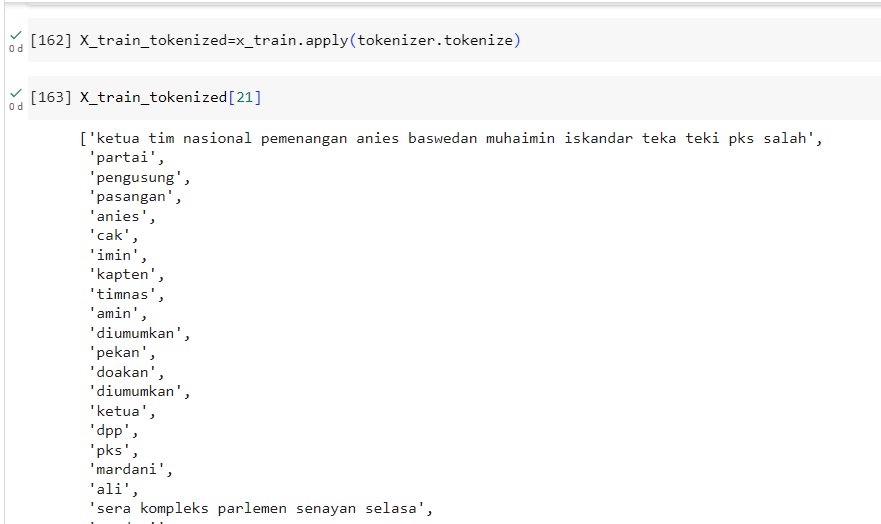

Sebelumnya saya juga sudah melakukan percobaan dimana saya tidak melakukan case folding pada data, namun PharserTokenizer tetap tidak dapat menangkap multi-word token dengan baik.

In [21]:
from nlp_id.tokenizer import Tokenizer

In [22]:
tokenizer = Tokenizer()

In [23]:
X_train_tokenized=x_train.apply(tokenizer.tokenize)

In [24]:
X_train_tokenized

6     [sekretaris, jenderal, sekjen, pdip, hasto, kr...
27    [capres, koalisi, indonesia, maju, prabowo, su...
12    [taylor, swift, resmi, leg, internasional, the...
17    [usai, jabar, anies, raja, jakarta, smallest, ...
9     [bagas, fikri, petik, ajar, harga, laga, final...
15    [lembaga, survei, riset, peta, elektabilitas, ...
33    [madrid, gagal, puncak, klasemen, liga, spanyo...
16    [rekor, rekor, pecah, andy, cryer, sport, okto...
36    [manchester, city, lawan, bournemouth, lanjut,...
35    [untung, buntung, sumber, gambar, foto, terang...
0     [amorim, hubung, mu, loading, ruben, amorim, k...
24    [sarang, muncul, kabar, kejut, umum, cerai, su...
5     [ketua, pssi, erick, thohir, proses, naturalis...
11    [indonesia, isu, politik, dinasti, asia, tengg...
40    [persija, jakarta, putus, tren, negatif, menan...
1     [mahkamah, konstitusi, uji, atur, syarat, usia...
31    [bioskop, tv, malam, jumat, tayang, bastille, ...
21    [salah, partai, usung, pasang, anies, cak,

In [25]:
X_test=x_test.apply(tokenizer.tokenize)

# **Text representation**

In [26]:
import gensim
from gensim.models import Word2Vec

Pada text represention ini saya menggunakan dua metode yaitu Word2Vec - Skipgram dan juga FastText. Untuk alasan dan penjelasanya akan dibahas setiap bagian Skipgram maupun FastText.

In [27]:
def vectorize_data_skipgram(data, model):
    vectorized_data = []
    for sentence in data:
        vec = np.zeros(model.vector_size)
        count = 0
        for word in sentence:
            if word in model.wv.key_to_index:
                vec += model.wv.get_vector(word)
                count += 1
        if count != 0:
            vec /= count
        vectorized_data.append(vec)
    return np.array(vectorized_data)

In [28]:
def vectorize_data_fasttext(data, model):
    vectorized_data = []
    for sentence in data:
        vec = np.zeros(model.vector_size)
        count = 0
        for word in sentence:
            if word in model.wv.key_to_index:
                vec += model.wv.get_vector(word, norm=True) #Untuk FastText menggunakan hasil yang telah dinormalisasi
                count += 1
        if count != 0:
            vec /= count
        vectorized_data.append(vec)
    return np.array(vectorized_data)

Kode ini berfungsi untuk mengubah data menjadi vektor

Untuk setiap kalimat dalam data, fungsi ini melakukan hal berikut:
* Membuat vektor nol dengan ukuran sama dengan model.vector_size.
* Menghitung jumlah kata dalam kalimat yang ada dalam vocabulari model.
* Untuk setiap kata dalam kalimat, jika kata tersebut ada dalam vocabulari model, fungsi ini menambahkan vektor kata tersebut ke vektor kalimat dan menambahkan satu ke penghitung kata.
* Setelah mengiterasi semua kata dalam kalimat, jika count tidak sama dengan 0, maka vec dibagi dengan count dan menghasilkan vektor rata-rata kalimat
* Vektor rata-rata kalimat ini kemudian ditambahkan ke vectorized_data.

#### **Skipgram**

*Skipgram* merupakan pendekatan Word2Vec yang base modelnya adalah ***MLP*** dengan one *hidden layer* dengan fungsi activasinya (input) linear dan softmax (output). Disini Saya memilih menggunakan *Skipgram* karena arsitektur dari *Skipgram* sendiri sesuai dengan permintaan soal dimana Vektor yang dihasilkan harus berdasarkan hasil training dengan input kata dan target output conteks


Pada gambar arsitektur Skipgram dibawah ini bisa kita lihat bahwa:

*   Input layernya berupa kata (word) dan merepresentasikan jumlah vocabulary-nya.
*   Memiliki satu hidden layer yang jumlah neuronya akan merepresentasikan jumlah vektor dan dimensi yang kita miliki
*   Output layernya sendiri berupa context
* Hasil vektor berdasarkan hasil training dengan input kata dan target output konteks

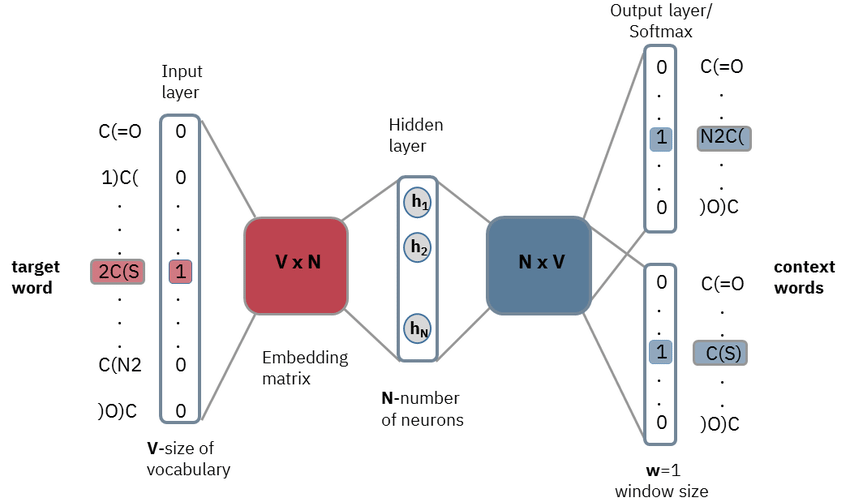

Oleh karena itu alasan saya menggunakan teknik Skipgram diantaranya adalah:

*   Hasil vektor berdasarkan hasil training dengan input kata dan target output konteks

> Teknik skipgram sendiri adalah teknik *text representation* yang menggunakan pendekatan supervised learning. Dalam pendekatan ini, model dilatih untuk memprediksi konteks dari sebuah kata. Context adalah kata-kata yang muncul di sekitar kata tersebut. Misalnya, kata `kucing` sering muncul di konteks `meong`, `ikan`, dan `bulu`.

> Dengan pendekatan ini, model akan belajar untuk mengonversi kata-kata menjadi vektor yang memiliki makna dan hubungan antara kata-kata tersebut. Vektor ini dapat digunakan untuk klasifikasi topik berita.

*   Dapat diatur size vektor menjadi 50

> Size vektor adalah jumlah dimensi dari vektor representasi kata. Vektor dengan size yang lebih besar dapat menampung lebih banyak informasi tentang kata tersebut.

*   Frequency kata yang diperhitungkan minimal 3

> Frequency kata adalah jumlah kemunculan kata tersebut dalam dataset. Kata-kata yang sering muncul memiliki makna yang lebih jelas dan lebih mudah dipelajari oleh model.

> Dalam kasus ini, frequency kata yang diperhitungkan minimal 3. Hal ini untuk menghindari kata-kata yang jarang digunakan dan tidak memiliki makna yang jelas.

Secara keseluruhan, teknik skipgram dengan size vektor 50 dan frequency kata minimal 3 merupakan teknik *text representation* yang tepat untuk digunakan dalam kasus ini. Teknik ini dapat menghasilkan representasi vektor yang sesuai dengan permintaan soal.

In [29]:
model_skipgram = gensim.models.Word2Vec(X_train_tokenized, min_count = 3,vector_size = 50, window = 5, sg=1)

Disini saya mengatur penyesuaian terhadap model Skipgram dimana pada permintaan soal bahwa model harus memiliki size vektor adalah 50, dan frequency kata yang diperhitungkan minimal 3. Oleh karena itu saya merubah `min_count = 3` yang menandakan frekuensi minimal kemunculan kata, `vector_size = 50` yang merupakan jumlah size vector yang nanti akan dihasilkan, `sg=1` yang menandakan bahwa model Word2Vec yang digunakan adalah Skipgram, serta mengatur jumlah  `window = 5` yang set kata yang akan diambil, karena dokumen yang cukup panjang dalam satu kalimat atau sample data maka windows size yang saya gunakan adalah 5.



In [30]:
vocabulary_skipgram = model_skipgram.wv.key_to_index
print(vocabulary_skipgram)

{'prabowo': 0, 'gibran': 1, 'indonesia': 2, 'pilih': 3, 'menang': 4, 'anies': 5, 'the': 6, 'gambar': 7, 'lagu': 8, 'jakarta': 9, 'film': 10, 'suara': 11, 'presiden': 12, 'putus': 13, 'ganjar': 14, 'gol': 15, 'politik': 16, 'ketua': 17, 'jokowi': 18, 'main': 19, 'liga': 20, 'cawapres': 21, 'tim': 22, 'cak': 23, 'imin': 24, 'messi': 25, 'survei': 26, 'musik': 27, 'jawa': 28, 'partai': 29, 'sumber': 30, 'hasil': 31, 'video': 32, 'mk': 33, 'calon': 34, 'terang': 35, 'dukung': 36, 'rekam': 37, 'masuk': 38, 'milik': 39, 'tampil': 40, 'jalan': 41, 'pasang': 42, 'baca': 43, 'musim': 44, 'orang': 45, 'nama': 46, 'beatles': 47, 'proses': 48, 'hubner': 49, 'subianto': 50, 'tanding': 51, 'wakil': 52, 'usia': 53, 'ballon': 54, 'rakabuming': 55, 'salah': 56, 'aku': 57, 'capres': 58, 'pilpres': 59, 'dunia': 60, 'd': 61, 'oktober': 62, 'or': 63, 'raka': 64, 'bawa': 65, 'maju': 66, 'temu': 67, 'muda': 68, 'sosok': 69, 'kali': 70, 'sebut': 71, 'and': 72, 'timnas': 73, 'ubah': 74, 'persija': 75, 'kla': 7

In [31]:
x_train_skip = vectorize_data_skipgram(X_train_tokenized, model_skipgram)

In [32]:
x_train_skip[0]

array([ 1.63588374e-01, -7.35266654e-02,  1.24360199e-01,  4.21034526e-02,
       -1.11679470e-01, -1.27136243e-01,  1.77058394e-01,  8.21034401e-02,
       -1.97188179e-01, -1.26900959e-01, -3.21195796e-02, -1.09139508e-01,
        1.22242822e-01, -5.43392415e-03,  4.72373727e-03,  2.35388319e-01,
        1.82603017e-01, -4.29226910e-02, -3.34414026e-01, -3.40782670e-01,
        6.12776579e-02,  2.53437259e-01,  1.92538782e-01, -1.88748109e-01,
        1.41096984e-01,  4.78704531e-02, -1.76223691e-01, -9.61154096e-02,
       -2.73505399e-01,  1.77031759e-01,  8.19019438e-02,  8.16185202e-02,
       -1.04650496e-01,  9.92730953e-02, -2.81667729e-01,  1.97821361e-01,
        7.56221780e-03, -8.64244949e-02, -4.44444639e-02, -1.61461078e-01,
        2.48136949e-01, -5.70118984e-02, -6.95915186e-02,  4.09120245e-04,
        4.93064198e-01,  3.66893510e-02, -1.52251810e-01, -6.58023632e-02,
        1.49749849e-01, -4.89016966e-03])

#### **Fasttext**

Metode berikutnya yang saya gunakan adalah dengan menggunakakan pendekatan FastText, secara umum FastText mirip dengan Skip-gram karena sama-sama memiliki input berupa kata dan output berupa context.

Namun, yang membedakan FastText dengan Skipgram adalah cara metode ini memandang kata, sebagai contoh adalah kata “Intelligence”. Daripada memandangnya sebagai satu entitas tunggal, FastText akan memecahnya menjadi beberapa n-gram. Misalnya, jika kita memilih untuk menggunakan trigram (n=3), `Intelligence` akan menjadi: `int`, `nte`, `tel`, `ell`, `lli`, `lig`, `ige`, `gen`, `enc`, `nce`. Setiap n-gram ini akan memiliki representasi vektor sendiri, dan representasi vektor untuk `Intelligence` akan menjadi rata-rata dari semua vektor n-gram ini.

Dengan metode ini, FastText dapat menghasilkan representasi yang masuk akal bahkan untuk kata-kata yang tidak pernah dilihat sebelumnya


---


Metode ini saya pilih karena sesuai dengan perminataan soal, yaitu:


*   Hasil vektor berdasarkan hasil training dengan input kata dan target output konteks.

> Metode FastText secara umum mirip dengan metode skip-gram untuk menghasilkan vektor. FastText melatih model untuk memprediksi konteks dari suatu kata.

*   Dapat diatur untuk size vektor

> Sama dengan metode Word2Vec lainya dimana pada metode FastText size vektor nya dapat disesuaikan, size vector sendiri adalah jumlah dimensi yang digunakan untuk mewakili suatu kata..

*   Dapat diatur untuk frequency kata yang diperhitungkan

> Frequency kata adalah jumlah kemunculan suatu kata dalam data. Kata-kata dengan frequency tinggi cenderung lebih penting dan dapat mewakili makna kalimat dengan lebih baik serta dapat mengurangi noise pada data.


In [33]:
meta_hyper = {
    "vector_size": 50,
    "alpha": 0.05,
    "window": 5,
    "min_freq" : 3,
    "epochs": 25,
    "data_size": len(X_train_tokenized),
    "tokens_number": len([td for td in X_train_tokenized]),
    "CPU": 8
}

Pada model FastText ini, saya telah melakukan percobaan tuning untuk mendapatkan representasi vektor terbaik, agar ketika vector diberikan kepada model SVM ataupun RandomForest bisa memberikan hasil performa yang baik.

Untuk hyperparameter terbaik yang saya dapatkan setelah melakukan beberapa percobaan adalah dengan nilai-nilai berikut:


```
    "vector_size": 50,
    "alpha": 0.05,
    "window": 5,
    "min_freq" : 3,
    "epochs": 25,
    "data_size": len(X_train_tokenized),
    "tokens_number": len([td for td in X_train_tokenized]),
    "CPU": 8
```

Dengan menggunakan tuning hyperparameter berikut, didapatkan hasil representasi vector yang dapat dibuktikan pada model Text Classification dibawah.

In [34]:
from gensim.models import FastText

ft_model = FastText(vector_size=meta_hyper['vector_size'],
                       window=meta_hyper['window'],
                       min_count = meta_hyper['min_freq'],
                       alpha= meta_hyper['alpha'],
                       workers=meta_hyper['CPU'])

ft_model.build_vocab(corpus_iterable=X_train_tokenized)

In [35]:
ft_model.train(X_train_tokenized, total_examples=len(X_train_tokenized), epochs=meta_hyper['epochs'])

(157706, 226725)

In [36]:
x_train_ft = vectorize_data_fasttext(X_train_tokenized, ft_model)

In [37]:
x_train_ft[0]

array([-0.11011271,  0.11583469,  0.12634055,  0.00812243, -0.26560185,
       -0.11107802, -0.03929826,  0.18666652, -0.13162218,  0.03155801,
       -0.14152557,  0.12289399,  0.08642117,  0.03064816,  0.03309723,
        0.19507354,  0.15931379, -0.22721915,  0.01112115,  0.06630978,
        0.20967863,  0.03811918,  0.08423522,  0.08311646, -0.00576803,
        0.00312127, -0.06295804,  0.04967115,  0.0489257 ,  0.03087809,
       -0.05854954, -0.14002457,  0.07323054,  0.12421562,  0.16005322,
       -0.14059352, -0.2295033 ,  0.03763938,  0.11278077, -0.12450756,
        0.03384477,  0.16405372,  0.05608555,  0.13913734,  0.07973748,
        0.12511709,  0.18683727, -0.00824885,  0.06203336,  0.00932492])

#**Model**

Model *machine learning* yang digunakan untuk melakukan klasifikasi topik berita adalah dengan menggunakan Support Vector Machine dan Random Forest Classifier yang nantinya akan dibandingkan dengan menggunakan metode *text representation* Skipgram dan FastText.

## **Support Vector Machine**

Dalam setiap model Support Vector Machine (SVM) yang saya kembangkan, saya menerapkan metode GridSearch. Metode ini digunakan untuk mencari dan menentukan hyperparameter terbaik yang dapat meningkatkan performa model. GridSearch bekerja dengan sistematis mencoba kombinasi berbagai hyperparameter dan menggunakan cross-validation untuk mengevaluasi performa setiap kombinasi. Dengan demikian, saya dapat memastikan bahwa model SVM yang saya kembangkan telah dioptimalkan dan mampu memberikan hasil terbaik tanpa harus membuat banyak model.

#### **SVM using Skipgram**

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

**Testing set diubah menjadi vector terlebih dahulu**

In [39]:
x_test_skip = vectorize_data_skipgram(X_test, model_skipgram)

In [40]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

svm_skip = SVC(random_state=42)
svm_skip_cv = GridSearchCV(estimator=svm_skip, param_grid=param_grid, scoring='accuracy', cv=5)
svm_skip_cv.fit(x_train_skip, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [41]:
print(svm_skip_cv.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [42]:
test_svm_skip=svm_skip_cv.predict(x_test_skip)

In [43]:
print('\nClassification Report\n')
print(classification_report(y_test, test_svm_skip))


Classification Report

              precision    recall  f1-score   support

     Hiburan       1.00      1.00      1.00         3
    Olahraga       1.00      0.67      0.80         3
     Politik       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9



Berikut adalah penjelasan dari masing-masing nilai dalam classification report:

* **Precision**
> * **Hiburan: 1.00** berarti bahwa **100%** dari berita yang diprediksi sebagai Hiburan oleh model benar-benar adalah Hiburan.
> * **Olahraga: 1.00** berarti bahwa **100%** dari berita yang diprediksi sebagai Olahraga oleh model benar-benar adalah Olahraga.
> * **Politik: 0.75** berarti bahwa **75%** dari berita yang diprediksi sebagai Politik oleh model benar-benar adalah Politik.

* **Recall**
> * **Hiburan: 1.00** berarti model telah berhasil mengidentifikasi semua berita Hiburan.
> * **Olahraga: 0.67** berarti model hanya berhasil mengidentifikasi **67%** dari berita Olahraga.
> * Politik: **1.00** berarti model hanya berhasil mengidentifikasi semua dari berita Politik.
* **F1-score**
```
Hiburan: 1.00
Olahraga: 0.80
Politik: 0.86
```
> F1-score merupakan kombinasi dari precision dan recall. F1-score yang tinggi menunjukkan bahwa model SVM mampu memprediksi kelas dengan baik, baik dari segi precision maupun recall.
* **Macro avg**
```
Precision: 0.92
Recall: 0.89
F1-score: 0.89
```
> Macro avg merupakan rata-rata dari precision, recall, dan f1-score untuk semua kelas. Macro avg yang tinggi menunjukkan bahwa model SVM mampu memprediksi semua kelas dengan baik.

* **Weighted avg**
```
Precision: 0.92
Recall: 0.89
F1-score: 0.89
```
> Weighted avg merupakan rata-rata dari precision, recall, dan f1-score untuk semua kelas, dengan bobot yang disesuaikan dengan jumlah data untuk masing-masing kelas. Weighted avg yang tinggi menunjukkan bahwa model SVM mampu memprediksi kelas dengan baik, bahkan untuk kelas dengan jumlah data yang sedikit.

Berdasarkan classification report diatas, model SVM dengan menggunkan metode Skipgram sebagai *text representation* memiliki performa yang baik dalam memprediksi isi topik berita. Hal ini dapat dilihat dari nilai **accuracy** yang mencapai **0.89**. Dalam kasus ini, model SVM mampu memprediksi isi topik berita dengan benar sebanyak **89%** dari total **9** prediksi.

Selain itu, dapat dilihat bahwa model SVM memiliki precision, recall, dan f1-score yang tinggi untuk kelas `Hiburan`. Hal ini berarti model SVM dapat dengan akurat memprediksi topik berita `Hiburan`. Namun, pada kelas `Politik` memiliki recall yang terendah yang menunjukan bahwa model SVM kesulitan menemukan semua sampel positif dalam kategori `Politik`.

Secara keseluruhan, model SVM menggunakan *text representation* Skipgram dapat memprediksi isi topik berita dengan yang sangat baik, hal ini dapat dilihat dari nilai accuracy, precision, recall, dan f1-score yang tinggi untuk semua kelas.

#### **SVM using FastText**

**Testing set diubah menjadi vector terlebih dahulu**

In [44]:
x_test_ft = vectorize_data_fasttext(X_test, ft_model)

In [45]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

svm_ft = SVC(random_state=42)
svm_ft_cv = GridSearchCV(estimator=svm_ft, param_grid=param_grid, scoring='accuracy', cv=5)
svm_ft_cv.fit(x_train_ft, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [46]:
print(svm_ft_cv.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [47]:
test_svm_ft=svm_ft_cv.predict(x_test_ft)

In [48]:
print('\nClassification Report\n')
print(classification_report(y_test, test_svm_ft))


Classification Report

              precision    recall  f1-score   support

     Hiburan       1.00      1.00      1.00         3
    Olahraga       1.00      0.67      0.80         3
     Politik       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9



Berikut adalah penjelasan dari masing-masing nilai dalam classification report:

* **Precision**
> * **Hiburan: 1.00** berarti bahwa **100%** dari berita yang diprediksi sebagai Hiburan oleh model benar-benar adalah Hiburan.
> * **Olahraga: 1.00** berarti bahwa **100%** dari berita yang diprediksi sebagai Olahraga oleh model benar-benar adalah Olahraga.
> * **Politik: 0.75** berarti bahwa **75%** dari berita yang diprediksi sebagai Politik oleh model benar-benar adalah Politik.

* **Recall**
> * **Hiburan: 1.00** berarti model telah berhasil mengidentifikasi semua berita Hiburan.
> * **Olahraga: 0.67** berarti model hanya berhasil mengidentifikasi **67%** dari berita Olahraga.
> * Politik: **1.00** berarti model hanya berhasil mengidentifikasi semua dari berita Politik.
* **F1-score**
```
Hiburan: 1.00
Olahraga: 0.80
Politik: 0.86
```
> F1-score merupakan kombinasi dari precision dan recall. F1-score yang tinggi menunjukkan bahwa model SVM mampu memprediksi kelas dengan baik, baik dari segi precision maupun recall.
* **Macro avg**
```
Precision: 0.92
Recall: 0.89
F1-score: 0.89
```
> Macro avg merupakan rata-rata dari precision, recall, dan f1-score untuk semua kelas. Macro avg yang tinggi menunjukkan bahwa model SVM mampu memprediksi semua kelas dengan baik.

* **Weighted avg**
```
Precision: 0.92
Recall: 0.89
F1-score: 0.89
```
> Weighted avg merupakan rata-rata dari precision, recall, dan f1-score untuk semua kelas, dengan bobot yang disesuaikan dengan jumlah data untuk masing-masing kelas. Weighted avg yang tinggi menunjukkan bahwa model SVM mampu memprediksi kelas dengan baik, bahkan untuk kelas dengan jumlah data yang sedikit.

Berdasarkan classification report diatas, model SVM dengan menggunkan metode FastText sebagai *text representation* memiliki performa yang sama dengan pada model SVM dengan menggunkan metode Skipgram sebagai *text representation*, dimana nilai accuracynya sama-sama memperoleh sebesar **0.89** atau **89%**.

---

#### **Perbandingan antara model SVM menggunakan *text representation* Skipgram dan FastText**

```
Model: Support Vector Machine
Parameter    FastText  | Skipgram
Akurasi	  89% 	  | 89%
Precision	0.92	  | 0.92      
Recall	   0.89	  | 0.89      
F1-score	 0.89	  | 0.89
```

#### **Kesimpulan untuk model SVM**

Dari kedua metode *text representation* yang digunakan untuk mengklasifikan topik berita menggunakan model SVM, dapat dilihat bahwa kedua model SVM yang menggunakan representasi teks **Skipgram maupun FastText, sama-sama memberikan nilai accuracy dan F1-Score yang sama.**

## **Random Forest**

Dalam setiap model Random Forest yang saya kembangkan, saya menerapkan metode GridSearch. Metode ini digunakan untuk mencari dan menentukan hyperparameter terbaik yang dapat meningkatkan performa model. GridSearch bekerja dengan sistematis mencoba kombinasi berbagai hyperparameter dan menggunakan cross-validation untuk mengevaluasi performa setiap kombinasi. Dengan demikian, saya dapat memastikan bahwa model Random Forest yang saya kembangkan telah dioptimalkan dan mampu memberikan hasil terbaik tanpa membuat banyak model.

#### **Random Forest using Skipgram**

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Testing set diubah menjadi vector terlebih dahulu**

In [50]:
x_test_skip = vectorize_data_skipgram(X_test, model_skipgram)

In [51]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

rf_skip = RandomForestClassifier()

rf_skip_cv = GridSearchCV(estimator=rf_skip, param_grid=param_grid, scoring='accuracy', cv=5)
rf_skip_cv.fit(x_train_skip, y_train)
rf_skip_pred = rf_skip_cv.predict(x_test_skip)

In [52]:
print(rf_skip_cv.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 200}


In [ ]:
print(classification_report(y_test, rf_skip_pred))

              precision    recall  f1-score   support

     Hiburan       0.75      1.00      0.86         3
    Olahraga       1.00      0.33      0.50         3
     Politik       0.75      1.00      0.86         3

    accuracy                           0.78         9
   macro avg       0.83      0.78      0.74         9
weighted avg       0.83      0.78      0.74         9



Berikut adalah penjelasan dari masing-masing nilai dalam classification report:

* **Precision**
> * **Hiburan: 0.75** berarti bahwa **75%** dari berita yang diprediksi sebagai Hiburan oleh model benar-benar adalah Hiburan.
> * **Olahraga: 1.00** berarti bahwa **100%** dari berita yang diprediksi sebagai Olahraga oleh model benar-benar adalah Olahraga.
>* **Politik: 0.75** berarti bahwa **75%** dari berita yang diprediksi sebagai Politik oleh model benar-benar adalah Politik.


* **Recall**
> * **Hiburan: 1.00** berarti model telah berhasil mengidentifikasi semua berita Hiburan.
> * **Olahraga: 0.33** berarti model hanya berhasil mengidentifikasi **33%** dari berita Olahraga.
> * **Politik: 1.00** berarti model telah berhasil mengidentifikasi semua berita Politik.

* **F1-score**
```
Hiburan: 0.86
Olahraga: 0.50
Politik: 0.86
```
> F1-score yang tinggi dari kelas `Hiburan` dan `Olahraga` menunjukkan bahwa model Random Forest mampu memprediksi kedua kelas dengan baik, baik dari segi precision maupun recall. Namun

* **Macro avg**
```
Precision: 0.83
Recall: 0.78
F1-score: 0.74
```
> Macro avg cukup baik menunjukkan bahwa model Random Forest cukup mampu memprediksi semua kelas dengan baik.

* **Weighted avg**
```
Precision: 0.83
Recall: 0.78
F1-score: 0.74
```
> Weighted avg yang cukup tinggi menunjukkan bahwa model Random Forest mampu memprediksi kelas dengan cukup baik.


Berdasarkan classification report di atas, model Random Forest dengan *text representation* Skipgram dapat memprediksi isi topik berita dengan akurasi sebesar 78% dan F1-Score sebesar 74%. Hal ini berarti model dapat memprediksi kelas topik berita dengan benar sebanyak 78% dari total 9.

Secara keseluruhan, model Random Forest dengan *text representation* Skipgram dapat memprediksi isi topik berita dengan cukup baik.

#### **Random Forest using FastText**

**Testing set diubah menjadi vector terlebih dahulu**

In [54]:
x_test_ft = vectorize_data_fasttext(X_test, ft_model)

In [55]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

rf_ft = RandomForestClassifier()

rf_ft_cv = GridSearchCV(estimator=rf_ft, param_grid=param_grid, scoring='accuracy', cv=5)
rf_ft_cv.fit(x_train_ft, y_train)
rf_ft_pred = rf_ft_cv.predict(x_test_ft)

In [56]:
print(rf_ft_cv.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}


In [57]:
print(classification_report(y_test, rf_skip_pred))

              precision    recall  f1-score   support

     Hiburan       1.00      1.00      1.00         3
    Olahraga       1.00      0.67      0.80         3
     Politik       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9



Berikut adalah penjelasan dari masing-masing nilai dalam classification report:

* **Precision**
> * **Hiburan: 1.00** berarti bahwa **100%** dari berita yang diprediksi sebagai Hiburan oleh model benar-benar adalah Hiburan.
> * **Olahraga: 1.00** berarti bahwa **100%** dari berita yang diprediksi sebagai Olahraga oleh model benar-benar adalah Olahraga.
> * **Politik: 0.75** berarti bahwa **75%** dari berita yang diprediksi sebagai Politik oleh model benar-benar adalah Politik.

* **Recall**
> * **Hiburan: 1.00** berarti model telah berhasil mengidentifikasi semua berita Hiburan.
> * **Olahraga: 0.67** berarti model hanya berhasil mengidentifikasi **67%** dari berita Olahraga.
> * Politik: **1.00** berarti model hanya berhasil mengidentifikasi semua dari berita Politik.
* **F1-score**
```
Hiburan: 1.00
Olahraga: 0.80
Politik: 0.86
```
> F1-score merupakan kombinasi dari precision dan recall. F1-score yang tinggi menunjukkan bahwa model SVM mampu memprediksi kelas dengan baik, baik dari segi precision maupun recall.
* **Macro avg**
```
Precision: 0.92
Recall: 0.89
F1-score: 0.89
```
> Macro avg merupakan rata-rata dari precision, recall, dan f1-score untuk semua kelas. Macro avg yang tinggi menunjukkan bahwa model SVM mampu memprediksi semua kelas dengan baik.

* **Weighted avg**
```
Precision: 0.92
Recall: 0.89
F1-score: 0.89
```
> Weighted avg merupakan rata-rata dari precision, recall, dan f1-score untuk semua kelas, dengan bobot yang disesuaikan dengan jumlah data untuk masing-masing kelas. Weighted avg yang tinggi menunjukkan bahwa model SVM mampu memprediksi kelas dengan baik, bahkan untuk kelas dengan jumlah data yang sedikit.

Berdasarkan classification report di atas, model Random Forest menggunakan *text representation* FastText dapat memprediksi isi topik berita dengan akurasi sebesar **0.89** atau **89%**, yang bisa dikatakan memiliki performa yang sama jika dibandingkan dengan model SVM menggunakan metode Text Representation FastText maupun Skipgram.

Secara keseluruhan, model Random Forest menggunakan *text representation* FastText dapat memprediksi isi topik berita dengan akurasi yang baik.

---

#### **Perbandingan antara model Random Forest menggunakan *text representation* Skipgram dan FastText**



```
Model: Random Forest Classifier
Parameter    FastText  | Skipgram
Akurasi	  89% 	  | 78%
Precision	0.92	  | 0.83
Recall	   0.89	  | 0.78
F1-score	 0.89	  | 0.74
```


#### **Kesimpulan untuk model Random Forest**

Secara keseluruhan, model Random Forest menggunakan *text representation* FastText lebih baik untuk memprediksi isi topik berita secara keseluruhan, sedangkan untuk model Random Forest dengan *text representation* Skipgram memiliki hasil terendah dari seluruh model dan metode yang telah dicoba.

# **Conclusion**
Berdasarkan perbandingan antara classification report dari model SVM dan Random Forest menggunakan *text representation* Skipgram dan FastText, dapat disimpulkan bahwa model SVM menggunakan *text representation* Skipgram, model SVM dengan menggunakan *text representation* FastText dan model Random Forest menggunakan *text representation* FastText, memiliki performa yang sama yaitu sebesar **89%** untuk accuracy dan F1-Score sebesar **89%**. Sedangkan model Random Forest menggunakan *text representation* Skipgram memiliki performa terendah dari ke-empat model ini, yaitu hanya sebesar 78% saja untuk accuracynya.

Ketiga model ini memiliki performa yang sama mungkin karena beberapa alasan berikut:

*   Dataset yang relatif kecil dimana hanya terdapat 42 berita, ukuran dataset yang terbatas mungkin menjadi faktor. Model mungkin berhasil mempelajari pola umum dalam dataset kecil ini, tetapi mungkin tidak cukup besar untuk mengungkapkan keunggulan satu metode representasi teks atas yang lainya.
* Mungkin dataset berita ini memiliki karakteristik yang membuatnya cukup seragam dalam hal representasi teks. Jika topik dan gaya bahasa dalam berita seragam, model mungkin menghadapi kesulitan dalam membedakan antara kategori menggunakan kedua metode representasi.
* Kemungkinan besar, representasi teks yang dihasilkan oleh Skipgram dan FastText pada dataset ini memiliki tingkat kesetaraan yang tinggi dalam konteks tugas klasifikasi berita ini. Ini bisa berarti bahwa keduanya berhasil menangkap informasi penting tentang topik berita dengan cara yang serupa meskipun keduanya memiliki nilai vektor yang berbeda.
*   Dataset yang digunakan mungkin sudah sangat bersih dan telah melalui proses preprocessing yang baik, termasuk cleaning dan lemmatization. Hal ini bisa membuat kedua model dapat belajar dengan baik dari data tersebut.
